<a href="https://colab.research.google.com/github/bttrung/CVND-udacity-facebook-scholarship/blob/master/images-processing/5_Standardizing_Day_and_Night_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 # computer vision library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os

%matplotlib inline

In [0]:
# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
    
    return im_list


In [17]:
# Clone the entire repo.
!git clone -l -s https://github.com/bttrung/CVND-udacity-facebook-scholarship.git
%cd cloned-repo
!ls



Cloning into 'CVND-udacity-facebook-scholarship'...
remote: Enumerating objects: 477, done.
remote: Counting objects: 100% (477/477), done.
remote: Compressing objects: 100% (474/474), done.
remote: Total 477 (delta 20), reused 410 (delta 1), pack-reused 0
Receiving objects: 100% (477/477), 29.86 MiB | 28.23 MiB/s, done.
Resolving deltas: 100% (20/20), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
CVND-udacity-facebook-scholarship  sample_data


In [18]:
!ls

CVND-udacity-facebook-scholarship  sample_data


In [0]:
training_dir = 'CVND-udacity-facebook-scholarship/images-processing/day_night_images/training'
test_dir = 'CVND-udacity-facebook-scholarship/images-processing/day_night_images/test'

In [0]:
IMAGE_LIST = load_dataset("CVND-udacity-facebook-scholarship/images-processing/day_night_images/training")

In [29]:
len(IMAGE_LIST)

240

In [0]:

# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

In [32]:
selected_label

'day'

Shape: (555, 800, 3)
Label: day


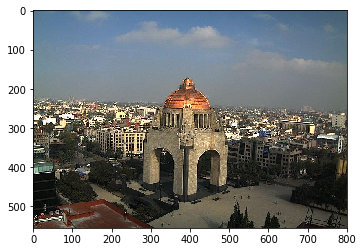

In [33]:
# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))

## Pre-process data

In [0]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    ## TODO: Resize image so that all "standard" images are the same size 600x1100 (hxw) 
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

In [0]:
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    if label == 'day':
        numerical_val = 1
    
    ## TODO: complete the code to produce a numerical label
    
    return numerical_val


##Consttruct STANDARDIZED LIST 

In [0]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


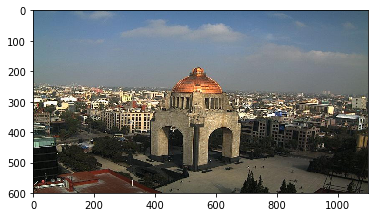

In [37]:

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))
